In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### import data

In [1]:
data=pd.read_excel('ANZ synthesised transaction dataset.xlsx')

NameError: name 'pd' is not defined

In [3]:
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


### Examine the data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

#### count Na(Not available ) values in each columns

In [5]:
temp=data.isnull()
temp[temp==True].count()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [6]:
data['amount'].describe()

count    12043.000000
mean       187.933588
std        592.599934
min          0.100000
25%         16.000000
50%         29.000000
75%         53.655000
max       8835.980000
Name: amount, dtype: float64

In [7]:
sns.set(style='darkgrid')

Text(0.5, 1.0, 'transaction distibution')

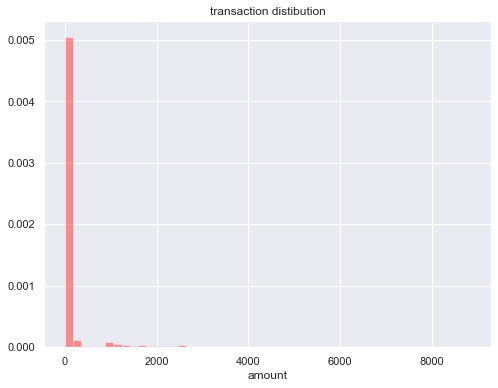

In [8]:
fig,ax=plt.subplots(figsize=(8,6))
sns.distplot(data['amount'],norm_hist=True,ax=ax,kde=False,color='red')
ax.set_title('transaction distibution')

In [9]:
fig.savefig('transaction distribution.png',bbox_inches='tight')

#### Average spending

In [10]:
 np.mean(data[data['movement']=='debit']['amount'])

52.57234318996403

#### Average transaction amount per month

In [11]:
temp=data
temp['month']=list(map(lambda x:x.month,data['date']))
temp.groupby('month').mean()['amount']

month
8     185.121867
9     182.045903
10    196.427323
Name: amount, dtype: float64

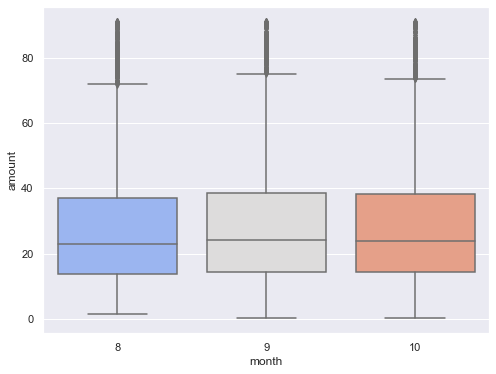

In [12]:
x=data['amount'].describe()
iqr=x['75%']-x['25%']
fig,ax=plt.subplots(figsize=(8,6))
sns.boxplot(data=temp[(temp['amount']<=x['75%']+iqr)],x='month',y='amount',palette='coolwarm')

In [13]:
fig.savefig('average transaction amount per month.png')

#### Average spending per month

In [14]:
temp[temp['movement']=='debit'].groupby('month').mean()['amount']

month
8     46.672480
9     57.191820
10    53.691457
Name: amount, dtype: float64

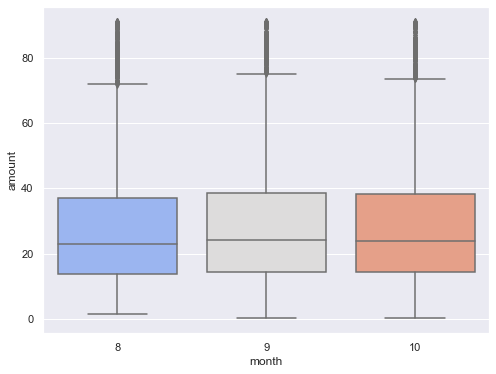

In [15]:
fig,ax=plt.subplots(figsize=(8,6))
sns.boxplot(data=temp[(temp['movement']=='debit')&(temp['amount']<=x['75%']+iqr)],x='month',y='amount',palette='coolwarm')

In [16]:
fig.savefig('average spending amount per month.png')

#### Number of transaction each month, in average

In [17]:
temp1=temp.groupby('month').count()
np.mean(temp1['amount'])

4014.3333333333335

#### summary of transaction of weekdays

In [18]:
temp['weekday']=list(map(lambda x:x.weekday(),data['date']))

In [19]:
day={1:'Mond',2:'Tues',3:'Wedn',4:'Thur',5:'Frid',6:'Sat',0:'Sun'}
temp['weekday']=temp['weekday'].map(day)

In [20]:
temp.groupby('weekday').mean()['amount']

weekday
Frid     54.419286
Mond    221.576456
Sat      53.015845
Sun     373.221000
Thur    249.353517
Tues    195.215570
Wedn    184.010422
Name: amount, dtype: float64

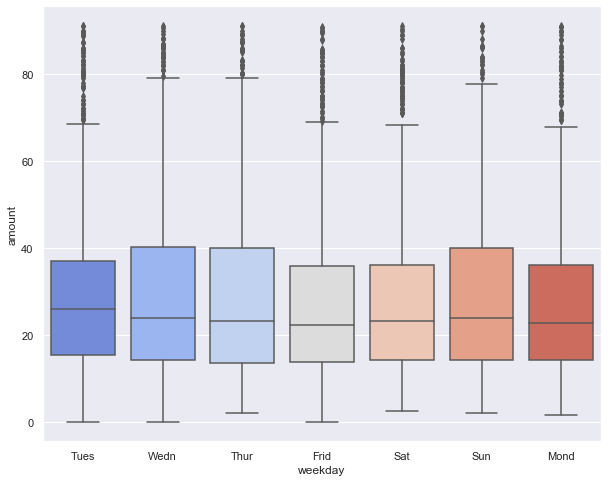

In [21]:
fig,ax=plt.subplots(figsize=(10,8))
sns.boxplot(data=temp[(temp['amount']<=x['75%']+iqr)],x='weekday',y='amount',palette='coolwarm')

In [22]:
fig.savefig('average transaction per weekdays.png')

In [23]:
temp['day']=list(map(lambda x:x.day,temp['date']))

In [24]:
temp.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,month,weekday,day
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,8,Tues,1
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,8,Tues,1
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,8,Tues,1
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,8,Tues,1
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,8,Tues,1


Text(0.5, 0, 'Day')

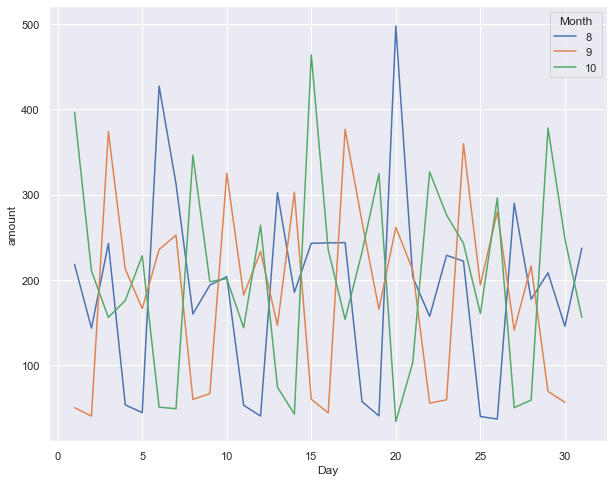

In [25]:
y=temp.groupby(['month','day']).mean()['amount'].fillna(0)
fig,ax=plt.subplots(figsize=(10,8))
for i in range(8,11):
    sns.lineplot(data=y[i],ax=ax,palette='coolwarm')
ax.legend(labels=[8,9,10],title='Month')
sns.set(style="darkgrid")
ax.set_ylabel('amount')
ax.set_xlabel('Day')

In [26]:
fig.savefig('lineplot1.png')

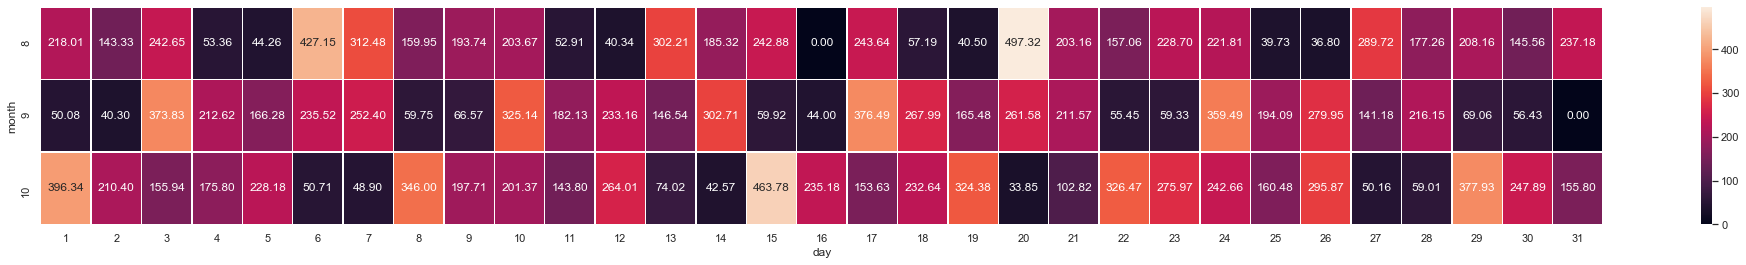

In [27]:
fig,ax=plt.subplots(figsize=(35,4))
sns.heatmap(data=y.unstack().fillna(0),fmt='.2f',annot=True,linecolor='white',linewidth=0.5)

In [28]:
fig.savefig('heatmap of transaction of each day.png',bbox_inches='tight')

In [29]:
y=temp[(temp['movement']=='debit')].groupby(['month','day']).mean()['amount'].fillna(0)

Text(0.5, 0, 'Day')

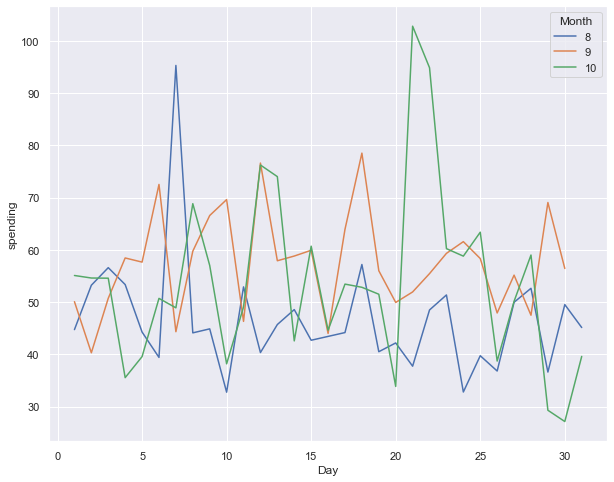

In [30]:
fig,ax=plt.subplots(figsize=(10,8))
for i in range(8,11):
    sns.lineplot(data=y[i],ax=ax,palette='coolwarm')
ax.legend(labels=[8,9,10],title='Month')
sns.set(style="darkgrid")
ax.set_ylabel('spending')
ax.set_xlabel('Day')

In [31]:
fig.savefig('lineplot2.png')

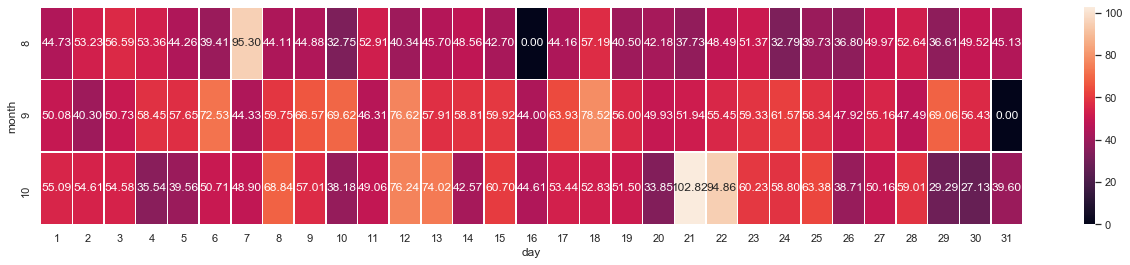

In [32]:
fig,ax=plt.subplots(figsize=(22,4))
sns.heatmap(data=y.unstack().fillna(0),fmt='.2f',annot=True,linecolor='white',linewidth=0.5)

In [33]:
fig.savefig('heatmap of spending.png',bbox_inches='tight')

In [34]:
data.groupby('merchant_suburb').sum().sort_values(by='amount',ascending=False)['amount'].head(10)

merchant_suburb
Sydney            21675.44
Melbourne         11943.53
South Brisbane    11740.58
Mascot            10282.62
Mount Gambier      4710.25
Malvern            3994.83
Maribyrnong        3770.83
Parap              3323.51
Brisbane City      2724.45
Mount Gravatt      2721.14
Name: amount, dtype: float64

#### summary of age

In [35]:
data['age'].describe()

count    12043.000000
mean        30.582330
std         10.046343
min         18.000000
25%         22.000000
50%         28.000000
75%         38.000000
max         78.000000
Name: age, dtype: float64

Text(0.5, 1.0, 'Age distribution')

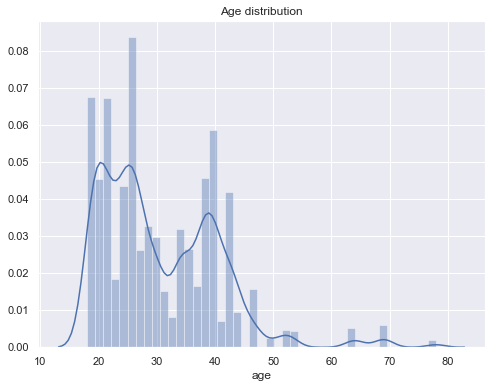

In [36]:
fig,ax=plt.subplots(figsize=(8,6))
sns.distplot(data['age'])
ax.set_title('Age distribution')

In [37]:
fig.savefig('age distribution.png')